# Python Translations of ADEs
https://www.ars.usda.gov/arsuserfiles/20361500/pdf_pubs/P0753.pdf

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from scipy.special import erfc as erfc
from scipy.special import erf as erf

## Case A1

In [305]:
#case A1 - Initial Concentration, 
#upper boundary: type 1, pulse
#lower boundary: semi-infinite
def ADE_1d_A1(x, t, v, R, Ci, C0, t0, al=None, D = None, silent = True):
    '''
    Advection Dispersion Equation Solution for No Production or Decay
    Case A1 - Pulse Injection, Type 1, Semi-Infinite
    From https://www.ars.usda.gov/arsuserfiles/20361500/pdf_pubs/P0753.pdf
    
    Boundary Conditions
    1.  c(x, 0) = Ci
    2a. c(0, t) = C0, when t is less than pulse time
    2b. c(0, t) = 0, when t is greater than pulse time
    3.  dc/dx(inf, t) = 0

    Arguments:
    x  = distance of evalulation
    t  = time of evalulation
    v  = velocity (L/T)
    al = dispersivity (L)
    R  = retardation factor (-)
    Ci = initial concentrtaion at x and t=0
    C0 = pulse concentration
    t0 = pulse duration (T)
    '''

    if (al is not None) & (D is None): 
        D = v*al #dispersion coeff
    elif (D is not None) & (al is None):
        D=D
    elif (D==None) & (al==None):
        print("Supply either D or al values")
    
    def Axt_func(x, t_):
        error_term0 = erfc(((R*x) - (v*t_))/(2*np.sqrt(D*R*t_)))
        error_term1 = erfc(((R*x) + (v*t_))/(2*np.sqrt(D*R*t_)))
        Axt = ((1/2)*error_term0) + (((1/2)*np.exp((v*x)/D)) * error_term1)
        return Axt

    #concentration conditions
    if t == 0: #the initial condition
        C = Ci
        if silent == False:
            print("initial condition: ", t, C)

    elif (0 < t) & (t <= t0): #where the time is less than the pulse time  
        C = Ci + (C0 - Ci) * Axt_func(x, t)
        if silent == False:
            print("pulse occuring: ", t, C)
    
    elif t > t0: #where the time is greater than the pulse -- why does it drop to zero?
        tt0 = t - t0  #difference between time and pulse
        C = Ci + (C0 - Ci)*Axt_func(x, t) - C0*Axt_func(x, tt0)  #second part should be subtracting off (superposition??) 
        
        if silent == False:
            print("after pulse:", t, C)
    
    #for simplicity #avoiding big negative numbers
    if C < 1e-8:
        C = 0.

    return C

D-x Ratio:  0.01


Text(0.5, 1.0, 'breakthru at x = 100')

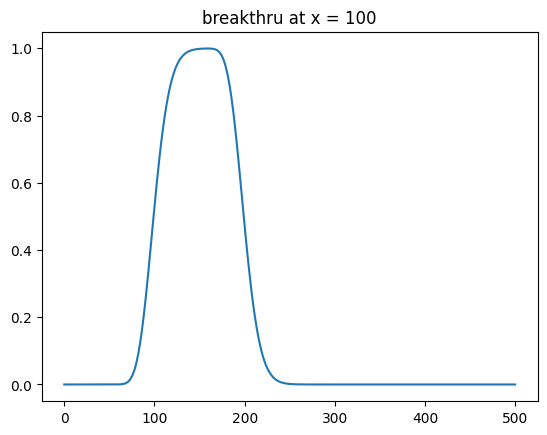

In [306]:
#breakthrough at a location
x = 100 #cm
times = np.linspace(0, 500, 500) #second

#velocity
v = 1. #cm/s

#dispersion
al = 1. #cm #starts to cause issues with far distances...
D = v*al
#dispersion check
if D < 0.001408*x: #the magic ratio...
    print("Dispersion is less than 1/1408 the distance, errors likely...\nD-x Ratio: ", D/x)
else:
    print("D-x Ratio: ", D/x)

#retardation factor
R= 1.0

# Initial concentration
Ci = 0 

#pulse information
C0 = 1. # Injected concentration
t0 = 100#duration of pulse not handling this correctly

#solving the solution over time.
sol = np.empty_like(times)
for i, t in enumerate(times):  
    C = ADE_1d_A1(x, t, v, R, Ci, C0, t0, D=D, silent = True)
    sol[i] = C

plt.plot(times, sol)
plt.title(f"breakthru at x = {x}")

## Case A2

In [307]:
#case A2 - Initial Concentration, 
#upper boundary: type 3,
#lower boundary: semi-infinite
def ADE_1d_A2(x, t, v, R, Ci, C0, t0, al=None, D = None, silent = True):
    '''
    Advection Dispersion Equation Solution for No Production or Decay
    Case A2 - Type 3, Semi-Infinite
    From https://www.ars.usda.gov/arsuserfiles/20361500/pdf_pubs/P0753.pdf
    
    Boundary Conditions
    1.  c(x, 0) = Ci
    2a. -D dc/dx + vc = vC0, when t is less than pulse time
    2b. -D dc/dx + vc = 0, when t is greater than pulse time
    3.  dc/dx(inf, t) = 0

    Arguments:
    x  = distance of evalulation
    t  = time of evalulation
    v  = velocity (L/T)
    al = dispersivity (L)
    R  = retardation factor (-)
    Ci = initial concentrtaion at x and t=0
    C0 = pulse concentration
    t0 = pulse duration (T)
    '''

    if (al is not None) & (D is None): 
        D = v*al #dispersion coeff
    elif (D is not None) & (al is None):
        D=D
    elif (D==None) & (al==None):
        print("Supply either D or al values")
    
    def Axt_func(x, t_):
        #error functions
        error_term0 = erfc(((R*x) - (v*t_))/(2*np.sqrt(D*R*t_)))
        error_term1 = erfc(((R*x) + (v*t_))/(2*np.sqrt(D*R*t_)))

        #A(x,t)
        Axt = ((1/2)*error_term0) + np.sqrt(((v**2)*t_)/(np.pi*D*R)) * np.exp(-1*((((R*x) - (v*t_))**2)/(4*D*R*t_))) - (1/2)*(1+((v*x)/D) + (((v**2)*t_)/(D*R))) * np.exp((v*x)/D) * error_term1
        
        return Axt

    #concentration conditions
    if t == 0: #the initial condition
        C = Ci
        if silent == False:
            print("initial condition: ", t, C)

    elif (0 < t) & (t <= t0): #where the time is less than the pulse time  
        C = Ci + (C0 - Ci) * Axt_func(x, t)
        if silent == False:
            print("pulse occuring: ", t, C)
    
    elif t > t0: #where the time is greater than the pulse -- why does it drop to zero?
        tt0 = t - t0  #difference between time and pulse
        C = Ci + (C0 - Ci)*Axt_func(x, t) - C0*Axt_func(x, tt0)  #second part should be subtracting off (superposition??) 
        
        if silent == False:
            print("after pulse:", t, C)
    
    #for simplicity #avoiding big negative numbers
    if C < 1e-8:
        C = 0.

    return C

0.8488263631567752
D-x Ratio:  0.015278874536821953
Flux at boundary:  8.48826363156775 M/L^2*T
Total Mass/Time at boundary:  53.05164769729844 M/T
Type 3 Solution:  997.9999999448252
Type 1 Solution:  997.9999999523287


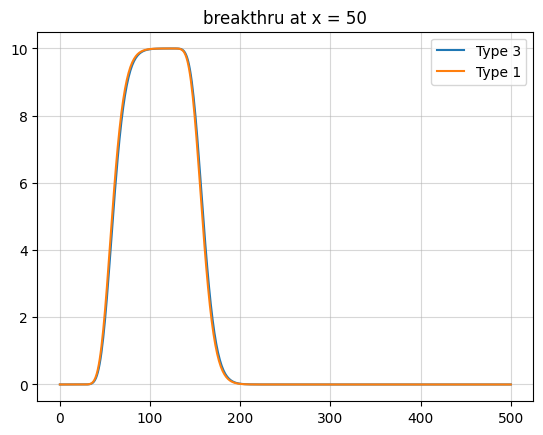

In [316]:
#breakthrough at a location
x = 50#cm
times = np.linspace(0, 500, 500) #second

#velocity from q
q = 5 # Injection rate (mL/sec) V/T
col_radius = 2.5 #cm
col_area = np.pi*2.5**2 #cm2
phi = 0.3

v = q/col_area/phi #cm/sec
print(v)

#dispersion
al = 0.9 #cm #starts to cause issues with far distances...
D = v*al
#dispersion check
if D < 0.001408*x: #the magic ratio...
    print("Dispersion is less than 1/1408 the distance, errors likely...\nD-x Ratio: ", D/x)
else:
    print("D-x Ratio: ", D/x)

#retardation factor
R= 1.0 #1=no retardation

#defines the flux gradient at theinlet boundary
Ci = 0. #initital concentration
C0 = 10. # defines the concentration of the flux boundary g/cm^3?
print("Flux at boundary: ", v*C0, "M/L^2*T")
t0 = 100#duration of flux boundary
print("Total Mass/Time at boundary: ", v*C0*col_radius**2, "M/T")

#Type 3======================================================
sol = np.empty_like(times)
for i, t in enumerate(times):  
    C = ADE_1d_A2(x, t, v, R, Ci, C0, t0, D=D, silent = True)
    sol[i] = C

plt.plot(times, sol, label = "Type 3")
plt.title(f"breakthru at x = {x}")

print("Type 3 Solution: ", np.trapz(sol))


#Type 1===================================================
sol = np.empty_like(times)
for i, t in enumerate(times):  
    C = ADE_1d_A1(x, t, v, R, Ci, C0, t0, D=D, silent = True)
    sol[i] = C

plt.plot(times, sol, label = "Type 1")
plt.title(f"breakthru at x = {x}")
print("Type 1 Solution: ", np.trapz(sol))


plt.grid(alpha = 0.5)
plt.legend()

0.16976527263135502
D-x Ratio:  0.015278874536821951
Type 3 Solution:  59.608643400999156


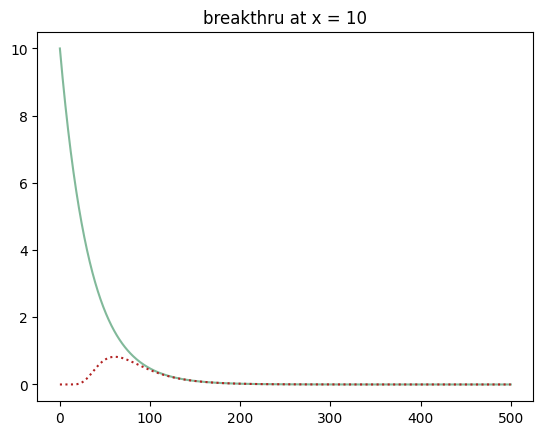

In [382]:
#breakthrough at a location time varying flux?
x = 10#cm
times = np.linspace(0, 500, 500) #second

#velocity from q
q = 1 # Injection rate (mL/sec) V/T
col_radius = 2.5 #cm
col_area = np.pi*2.5**2 #cm2
phi = 0.3

v = q/col_area/phi #cm/sec
print(v)

#dispersion
al = 0.9 #cm #starts to cause issues with far distances...
D = v*al
#dispersion check
if D < 0.001408*x: #the magic ratio...
    print("Dispersion is less than 1/1408 the distance, errors likely...\nD-x Ratio: ", D/x)
else:
    print("D-x Ratio: ", D/x)

#retardation factor
R= 1.0 #1=no retardation

#defines the flux gradient at theinlet boundary
Ci =0

#decreasing source exponential decay
C0 = 10 * 0.97**times
# C0 = 10
# print("Flux at boundary: ", v*C0, "M/L^2*T")
t0 = 500#duration of flux boundary
# print("Total Mass/Time at boundary: ", v*C0*col_radius**2, "M/T")

#Type 3======================================================
sol = np.empty_like(times)
for i, t in enumerate(times):  
    # C0 = Cs[i]
    C = ADE_1d_A2(x, t, v, R, Ci, C0[i], t0, D=D, silent = True)
    sol[i] = C

plt.plot(times, sol, label = "Type 3", ls = ":", c = "firebrick", zorder = 5)
plt.plot(times, C0, label = "Input C", c = "seagreen", alpha=0.6)
plt.title(f"breakthru at x = {x}")

print("Type 3 Solution: ", np.trapz(sol))

0.8488263631567752
D-x Ratio:  0.060018025677751774
Flux at boundary:  8.48826363156775 M/L^2*T
Total Mass/Time at boundary:  53.05164769729844 M/T
989.9988298197577
215.45205457570023
0.0


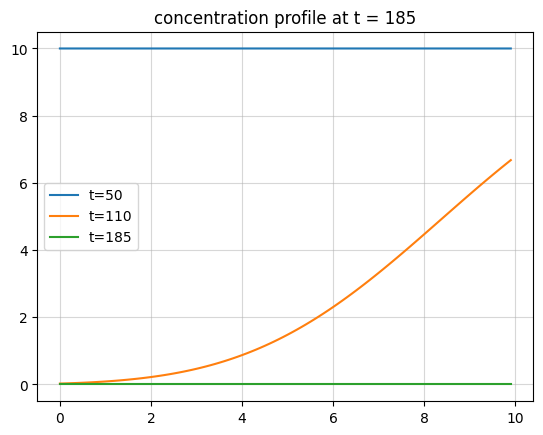

In [299]:
#concentration profile
dist = np.arange(0, 10, 0.1)#cm
times = [50, 110, 185] #seconds
# times = np.linspace(0, 500, 250) #second

#velocity from q
q = 5 # Injection rate (mL/sec) V/T
col_radius = 2.5 #cm
col_area = np.pi*2.5**2 #cm2
phi = 0.3

v = q/col_area/phi #cm/sec
print(v)

#dispersion
al = 0.7 #cm #starts to cause issues with far distances...
D = v*al
#dispersion check
if D < 0.001408*x: #the magic ratio...
    print("Dispersion is less than 1/1408 the distance, errors likely...\nD-x Ratio: ", D/x)
else:
    print("D-x Ratio: ", D/x)

#retardation factor
R= 1.0

#defines the flux gradient at theinlet boundary
Ci = 0. #initital concentration
C0 = 10. # defines the concentration of the flux boundary mg/mL?
print("Flux at boundary: ", v*C0, "M/L^2*T")
t0 = 100#duration of flux boundary
print("Total Mass/Time at boundary: ", v*C0*col_radius**2, "M/T")

#solving the solution over time.
for t in times:
    sol = np.empty_like(dist)
    for i, x in enumerate(dist):  
        C = ADE_1d_A2(x, t, v, R, Ci, C0, t0, D=D, silent = True)
        sol[i] = C
    
    plt.plot(dist, sol, label = f"t={t}")
    plt.title(f"concentration profile at t = {t}")
    plt.grid(alpha = 0.5)
    

    print(np.trapz(sol))

plt.legend()

## Verification of Trans1D

In [396]:
#dataset for Nathphalene
time = np.array([36.525, 766.525, 1496.525, 2226.525, 2956.525, 3686.525, 4416.525, 5146.525, 5876.525, 6606.525, 7336.525, 8066.525, 8796.525, 9526.525, 10256.525, 10986.525, 11716.525, 12446.525, 13176.525, 13906.525, 14636.525, 15366.525, 16096.525, 16826.525, 17556.525, 18286.525, 19016.525, 19746.525, 20476.525, 21206.525, 21936.525, 22666.525, 23396.525, 24126.525, 24856.525, 25586.525, 26316.525, 27046.525, 27776.525, 28506.525, 29236.525, 29966.525, 30696.525, 31426.525, 32156.525, 32886.525, 33616.525, 34346.525, 35076.525, 35806.525])
conc = np.array([0, 0, 0, 0, 0, 0, 4.76008121808036E-13, 1.37909583752815E-09, 3.90081992263092E-07, 2.33856547917632E-05, 0.000474473701449596, 0.00439801200838802, 0.022797280988169, 0.0761814719406465, 0.1820915414637, 0.336552555570964, 0.509330367113344, 0.655204525790202, 0.730644620851264, 0.71226066263009, 0.610003930978956, 0.461796412672667, 0.311607818147164, 0.189260150156679, 0.104532494149359, 0.0530276049552328, 0.0249353577444416, 0.010959907381164, 0.004536152999009, 0.00177945329786788, 0.000665400904606095, 0.000238368210641493, 8.21638640200462E-05, 2.73555358535349E-05, 8.8267827407229E-06, 2.76845825397665E-06, 8.46224985195931E-07, 2.52667334832424E-07, 7.38443842740466E-08, 2.11632500413117E-08, 5.95730254016047E-09, 1.64949365277778E-09, 4.49833059690263E-10, 1.20965348848756E-10, 3.21098703182088E-11, 8.42170777559659E-12, 2.18425277864753E-12, 5.60662627435704E-13, 1.4255263636187E-13, 3.59712259978551E-14])

1.0126
python 5.00342464931072
trans1d 5.0034246575342145
error:  -8.22349477402895e-09


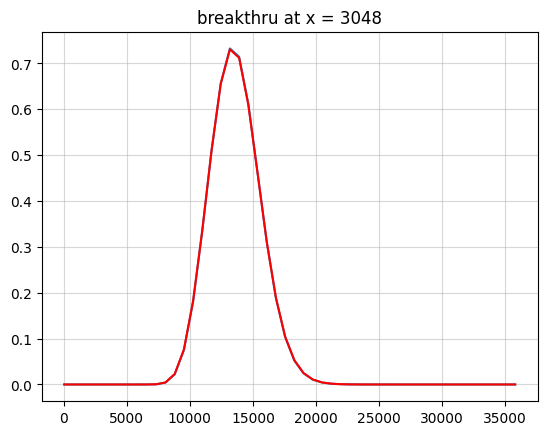

In [407]:
source_conc = 1 #mg/L
times = np.linspace(0, 36500, 50) #days

koc = 1190
k = 90 #m/d
por = 0.17 #[-]
gradient = 0.0005 #m/m
al = 30.48 #m
bulkd = 1.8 #g/cm3
foc = 1e-6

#calc params
gw_vel = 0.2647 #m/d
D = 8.068235294 #m2/d
R = 1+(bulkd/por)*foc*koc
print(R)

x = 3048 #m

pulse_len = 3652.5

sol = np.empty_like(time)
for i, t in enumerate(time):
    C = ADE_1d_A2(x, t, gw_vel, R, 0, source_conc, pulse_len, al = al, silent = True)
    sol[i] = C

plt.plot(time, sol, label = "Python")
plt.plot(time, conc, label = "Trans1D", c = "r")
plt.title(f"breakthru at x = {x}")
plt.grid(alpha = 0.5)

print("python", np.trapz(sol))
print("trans1d", np.trapz(conc))
print("error: ", np.trapz(sol)-np.trapz(conc))

## Case 3

In [389]:
#case A1 - Initial Concentration, 
#upper boundary: type 1, pulse
#lower boundary: semi-infinite
def ADE_1d_A3(x, L, t, v, R, Ci, C0, t0, al=None, D = None, silent = True):
    '''
    Advection Dispersion Equation Solution for No Production or Decay
    Case A3 - Pulse Injection, Type 1, Finite
    From https://www.ars.usda.gov/arsuserfiles/20361500/pdf_pubs/P0753.pdf
    
    Boundary Conditions
    1.  c(x, 0) = Ci
    2a. c(0, t) = C0, when t is less than pulse time
    2b. c(0, t) = 0, when t is greater than pulse time
    3.  dc/dx(L, t) = 0

    Arguments:
    x  = distance of evalulation
    L  = length of column
    t  = time of evalulation
    v  = velocity (L/T)
    al = dispersivity (L)
    R  = retardation factor (-)
    Ci = initial concentrtaion at x and t=0
    C0 = pulse concentration
    t0 = pulse duration (T)
    '''

    if (al is not None) & (D is None): 
        D = v*al #dispersion coeff
    elif (D is not None) & (al is None):
        D=D
    elif (D==None) & (al==None):
        print("Supply either D or al values")
    
    def Axt_func(x, t_):
        error_term0 = erfc(((R*x) - (v*t_))/(2*np.sqrt(D*R*t_)))
        error_term1 = erfc(((R*x) + (v*t_))/(2*np.sqrt(D*R*t_)))
        error_term2 = erfc(((R*((2*L)-x)) + (v*t_))/(2*np.sqrt(D*R*t_)))
        
        Axt = ((1/2)*error_term0) + ((1/2)*np.exp((v*x)/D)) * error_term1 + \
        (1/2)*(2 + (v*((2*L) - x)/D) + (((v**2)*t_)/(D*R)))*np.exp((v*L)/D) * \
               error_term2 - np.sqrt(((v**2)*t_)/(np.pi*D*R)) * \
               np.exp(((v*L)/D)-(R/(4*D*t_))*((2*L-x)+(v*t_)/R)**2)
        
        return Axt

    #concentration conditions
    if t == 0: #the initial condition
        C = Ci
        if silent == False:
            print("initial condition: ", t, C)

    elif (0 < t) & (t <= t0): #where the time is less than the pulse time  
        C = Ci + (C0 - Ci) * Axt_func(x, t)
        if silent == False:
            print("pulse occuring: ", t, C)
    
    elif t > t0: #where the time is greater than the pulse -- why does it drop to zero?
        tt0 = t - t0  #difference between time and pulse
        C = Ci + (C0 - Ci)*Axt_func(x, t) - C0*Axt_func(x, tt0)  #second part should be subtracting off (superposition??) 
        
        if silent == False:
            print("after pulse:", t, C)
    
    #for simplicity #avoiding big negative numbers
    if C < 1e-8:
        C = 0.

    return C

0.8488263631567752
D-x Ratio:  0.015278874536821953
Flux at boundary:  0.8488263631567752 M/L^2*T
Total Mass/Time at boundary:  5.305164769729845 M/T
Type 1 (Finite) Solution:  99.79999995026373
Type 1 Solution:  99.79999994873884


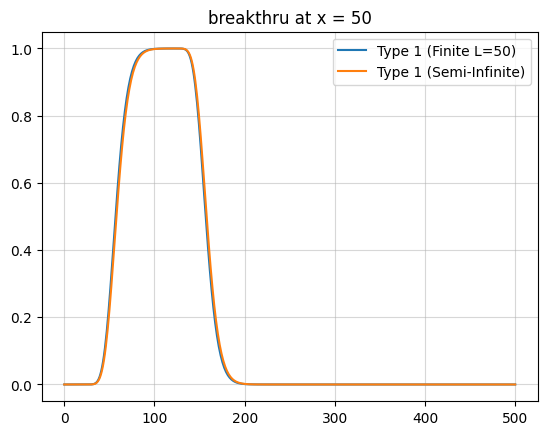

In [394]:
#breakthrough at a location
x = 50#cm
L = 50
times = np.linspace(0, 500, 500) #second

#velocity from q
q = 5 # Injection rate (mL/sec) V/T
col_radius = 2.5 #cm
col_area = np.pi*2.5**2 #cm2
phi = 0.3

v = q/col_area/phi #cm/sec
print(v)

#dispersion
al = 0.9 #cm #starts to cause issues with far distances...
D = v*al
#dispersion check
if D < 0.001408*x: #the magic ratio...
    print("Dispersion is less than 1/1408 the distance, errors likely...\nD-x Ratio: ", D/x)
else:
    print("D-x Ratio: ", D/x)

#retardation factor
R= 1.0 #1=no retardation

#defines the flux gradient at theinlet boundary
Ci = 0. #initital concentration
C0 = 1. # defines the concentration of the flux boundary g/cm^3?
print("Flux at boundary: ", v*C0, "M/L^2*T")
t0 = 100#duration of flux boundary
print("Total Mass/Time at boundary: ", v*C0*col_radius**2, "M/T")

#Type 3======================================================
sol = np.empty_like(times)
for i, t in enumerate(times):  
    C = ADE_1d_A3(x, L, t, v, R, Ci, C0, t0, D=D, silent = True)
    sol[i] = C

plt.plot(times, sol, label = f"Type 1 (Finite, L={L})")
plt.title(f"breakthru at x = {x}")

print("Type 1 (Finite) Solution: ", np.trapz(sol))


#Type 1===================================================
sol = np.empty_like(times)
for i, t in enumerate(times):  
    C = ADE_1d_A1(x, t, v, R, Ci, C0, t0, D=D, silent = True)
    sol[i] = C

plt.plot(times, sol, label = "Type 1 (Semi-Infinite)")
plt.title(f"breakthru at x = {x}")
print("Type 1 Solution: ", np.trapz(sol))


plt.grid(alpha = 0.5)
plt.legend()

In [63]:
#case A1 - Initial Concentration, 
#upper boundary: type 1, pulse
#lower boundary: semi-infinite
def ADE_1d_A9(x, t, v, R, Ci, Ca, Cb, lamb, al=None, D = None, silent = True):
    '''
    Advection Dispersion Equation Solution for No Production or Decay
    Case A9 - Decaying source, Type 1, semi-infinite
    From https://www.ars.usda.gov/arsuserfiles/20361500/pdf_pubs/P0753.pdf
    
    Boundary Conditions
    1.  c(x, 0) = Ci
    2a. c(0, t) = C0, when t is less than pulse time
    2b. c(0, t) = 0, when t is greater than pulse time
    3.  dc/dx(L, t) = 0

    Arguments:
    x  = distance of evalulation
    t  = time of evalulation
    v  = velocity (L/T)
    al = dispersivity (L)
    R  = retardation factor (-)
    Ci = initial concentrtaion at x and t=0
    Ca = Constant A
    Cb = Constant B
    lamb = lambda (decay rate)
    '''

    if (al is not None) & (D is None): 
        D = v*al #dispersion coeff
    elif (D is not None) & (al is None):
        D=D
    elif (D==None) & (al==None):
        print("Supply either D or al values")
    
    def Axt_func(x, t_):
        error_term0 = erfc(((R*x) - (v*t_))/(2*np.sqrt(D*R*t_)))
        error_term1 = erfc(((R*x) + (v*t_))/(2*np.sqrt(D*R*t_)))
        
        Axt = ((1/2)*error_term0) + ((1/2)*np.exp((v*x)/D)) * error_term1
        
        return Axt

    def Bxt_func(x, t_):
        y = v*np.sqrt(1-(4*lamb*D*R/v**2))
        error_term0 = erfc(((R*x) - (y*t_))/(2*np.sqrt(D*R*t_)))
        error_term1 = erfc(((R*x) + (y*t_))/(2*np.sqrt(D*R*t_)))

        Bxt = np.exp(-lamb*t_)*((1/2)*np.exp(((v-y)*x)/(2*D))*error_term0 + \
                                    (1/2)*np.exp(((v+y)*x)/(2*D))*error_term1)
        
        return Bxt

    #concentration conditions
    if t == 0: #C(x,0)
        C = Ci
        if silent == False:
            print("initial condition: ", t, C)

    elif 0 < t: #C(x,t)
        C = Ci + (Ca - Ci) * Axt_func(x, t) + Cb*Bxt_func(x,t)
        if silent == False:
            print("decay functions: ", t, C)

    
    #for simplicity #avoiding big negative numbers
    if C < 1e-8:
        C = 0.

    return C

0.16976527263135502
Dispersion is less than 1/1408 the distance, errors likely...
D-x Ratio:  0.00033953054526271003


Text(0.5, 1.0, 'breakthru at x = 50')

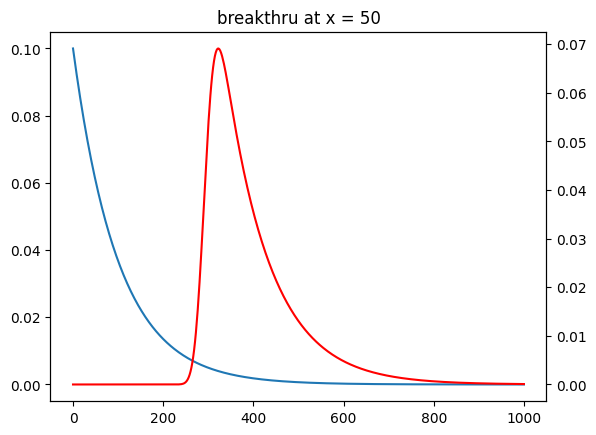

In [65]:
#breakthrough at a location
x = 50#cm
times = np.linspace(0, 1000, 500) #second

#velocity from q
q = 1 # Injection rate (mL/sec) V/T
col_radius = 2.5 #cm
col_area = np.pi*2.5**2 #cm2
phi = 0.3

v = q/col_area/phi #cm/sec
print(v)

#dispersion
al = 0.1 #cm #starts to cause issues with far distances...
D = v*al
#dispersion check
if D < 0.001408*x: #the magic ratio...
    print("Dispersion is less than 1/1408 the distance, errors likely...\nD-x Ratio: ", D/x)
else:
    print("D-x Ratio: ", D/x)

#retardation factor
R= 1.0 #1=no retardation

#defines the flux gradient at theinlet boundary
Ci = 0. #initital concentration
Ca = 0. # concentration baseline
Cb = 0.1 # input concentratin that decays
lamb = 0.01

#plot the source decay function
C_source = Ca + Cb*np.exp(1)**(-lamb*times)
# plt.plot(C_source)

#Type 1======================================================
sol = np.empty_like(times)
for i, t in enumerate(times):  
    C = ADE_1d_A9(
        x=x, 
        t=t, 
        v=v, 
        R=R, 
        Ci=Ci, 
        Ca=Ca,
        Cb=Cb,
        lamb=lamb,
        D=D, 
        silent = True
    )
    sol[i] = C

fig, ax = plt.subplots(1,1)
ax.plot(times, C_source)
ax1=ax.twinx()
ax1.plot(times, sol, label = f"Type 1 (Source Decay)", c = 'r')

ax.set_title(f"breakthru at x = {x}")

# print("Type 1 (Finite) Solution: ", np.trapz(sol))


# #Type 1===================================================
# sol = np.empty_like(times)
# for i, t in enumerate(times):  
#     C = ADE_1d_A1(x, t, v, R, Ci, C0, t0, D=D, silent = True)
#     sol[i] = C

# plt.plot(times, sol, label = "Type 1 (Semi-Infinite)")
# plt.title(f"breakthru at x = {x}")
# print("Type 1 Solution: ", np.trapz(sol))


# plt.grid(alpha = 0.5)
# plt.legend()

In [ ]:
#case A1 - Initial Concentration, 
#upper boundary: type 1, pulse
#lower boundary: semi-infinite
def ADE_1d_A10(x, t, v, R, Ci, Ca, Cb, lamb, al=None, D = None, silent = True):
    '''
    Advection Dispersion Equation Solution for No Production or Decay
    Case A10 - Decaying source, Type 3, semi-infinite
    From https://www.ars.usda.gov/arsuserfiles/20361500/pdf_pubs/P0753.pdf
    
    Boundary Conditions
    1.  c(x, 0) = Ci
    2a. c(0, t) = C0, when t is less than pulse time
    2b. c(0, t) = 0, when t is greater than pulse time
    3.  dc/dx(L, t) = 0

    Arguments:
    x  = distance of evalulation
    t  = time of evalulation
    v  = velocity (L/T)
    al = dispersivity (L)
    R  = retardation factor (-)
    Ci = initial concentrtaion at x and t=0
    Ca = Constant A
    Cb = Constant B
    lamb = lambda (decay rate)
    '''

    if (al is not None) & (D is None): 
        D = v*al #dispersion coeff
    elif (D is not None) & (al is None):
        D=D
    elif (D==None) & (al==None):
        print("Supply either D or al values")
    
    def Axt_func(x, t_):
        error_term0 = erfc(((R*x) - (v*t_))/(2*np.sqrt(D*R*t_)))
        error_term1 = erfc(((R*x) + (v*t_))/(2*np.sqrt(D*R*t_)))
        
        Axt = ((1/2)*error_term0) + ((1/2)*np.exp((v*x)/D)) * error_term1
        
        return Axt

    def Bxt_func(x, t_):
        y = v*np.sqrt(1-(4*lamb*D*R/v**2))
        error_term0 = erfc(((R*x) - (y*t_))/(2*np.sqrt(D*R*t_)))
        error_term1 = erfc(((R*x) + (y*t_))/(2*np.sqrt(D*R*t_)))

        Bxt = np.exp(-lamb*t_)*((1/2)*np.exp(((v-y)*x)/(2*D))*error_term0 + \
                                    (1/2)*np.exp(((v+y)*x)/(2*D))*error_term1)
        
        return Bxt

    #concentration conditions
    if t == 0: #C(x,0)
        C = Ci
        if silent == False:
            print("initial condition: ", t, C)

    elif 0 < t: #C(x,t)
        C = Ci + (Ca - Ci) * Axt_func(x, t) + Cb*Bxt_func(x,t)
        if silent == False:
            print("decay functions: ", t, C)

    
    #for simplicity #avoiding big negative numbers
    if C < 1e-8:
        C = 0.

    return C

In [ ]:
# import numpy as np
# from scipy.integrate import solve_ivp
# import matplotlib.pyplot as plt

# # Define parameters
# L = 10          # Length of the domain
# T = 5           # Total time
# Nx = 100        # Number of spatial points
# u = 1           # Velocity
# D = 0.1         # Dispersion coefficient
# x = np.linspace(0, L, Nx)
# dx = L / (Nx - 1)

# # Define the initial condition
# def initial_condition(x):
#     return np.exp(-(x - 3)**2 / 2)

# # Define the third-type boundary condition function f(t) here...
# def boundary_condition(t):
#     return 100  # Example: constant flux

# # Define the system of ODEs using method of lines
# def advection_dispersion_eq(t, C):
#     dCdt = np.zeros_like(C)

#     # Spatial derivatives using finite differences
#     dCdx = np.gradient(C, dx)
#     d2Cdx2 = np.gradient(dCdx, dx)
    
#     # Apply the advection-dispersion equation
#     dCdt[1:-1] = -u * dCdx[1:-1] + D * d2Cdx2[1:-1]

#     # Apply the boundary conditions
#     # Third-type (Robin) BC at x=0
#     dCdx0 = (C[1] - C[0]) / dx
#     dCdt[0] = (u*C[0] - boundary_condition(t))/D
    
#     # Zero-gradient BC at x=L (outflow)
#     dCdt[-1] = -u*dCdx[-1] + D*d2Cdx2[-1]

#     return dCdt

# # Time integration
# t_eval = np.linspace(0, T, 100)
# sol = solve_ivp(advection_dispersion_eq, [0, T], initial_condition(x), t_eval=t_eval, method='RK45')

# # Plotting the results
# plt.figure(figsize=(10, 6))
# # plt.plot(t_eval, sol.y)
# plt.plot(x, sol.y[:, 6])
# # for i in range(len(t_eval)):
# #     plt.plot(x, sol.y[:, i], label=f't = {t_eval[i]:.2f}')

# plt.xlabel('x')
# plt.ylabel('C')
# plt.title('1D Advection-Dispersion Equation with Third-Type BC')
# # plt.legend()
# plt.grid(True)
# plt.show()